In [1]:
import pandas as pd # read data from a CSV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
import math
import numpy as np

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance # shuffling_idx  X_permuted

In [2]:
data=pd.read_csv(r"../data_prep/prism_df_summer_13092747.csv")  #12413370,13266000, 13311000, 13340600, 13092747

print(data)
print(data.columns)

      Unnamed: 0        Date  ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
0            152  2013-06-01      0.00               6.9               13.8   
1            153  2013-06-02      0.00               8.0               16.9   
2            154  2013-06-03      0.00              10.1               18.6   
3            155  2013-06-04      0.00               9.9               16.5   
4            156  2013-06-05      0.00               9.9               17.5   
...          ...         ...       ...               ...                ...   
1003        3826  2023-08-27      3.43              15.3               22.2   
1004        3827  2023-08-28      0.00              15.6               23.8   
1005        3828  2023-08-29      0.00              15.0               24.6   
1006        3829  2023-08-30      0.00              13.5               25.2   
1007        3830  2023-08-31      0.00               9.6               16.7   

      tmax..degrees.C.  tdmean..degrees.C.  vpdmin.

In [3]:
data[[ 'tmax..degrees.C.','X_00010_00001']].corr()

,tmax..degrees.C.,X_00010_00001
tmax..degrees.C.,1.00000,0.68996
X_00010_00001,0.68996,1.00000


                    ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
ppt..mm.            1.000000         -0.037089          -0.163020   
tmin..degrees.C.   -0.037089          1.000000           0.915101   
tmean..degrees.C.  -0.163020          0.915101           1.000000   
tmax..degrees.C.   -0.236023          0.762019           0.958184   
tdmean..degrees.C.  0.238212          0.527929           0.430373   
vpdmin..hPa.       -0.241922          0.657678           0.657565   
vpdmax..hPa.       -0.281024          0.662047           0.888433   
X_00010_00001      -0.139150          0.627889           0.707372   
X_00010_00003      -0.093525          0.742726           0.804791   
X_00060_00003       0.309949         -0.173449          -0.232925   
doy                -0.004704          0.319408           0.340421   

                    tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  \
ppt..mm.                   -0.236023            0.238212     -0.241922   
tmin..degrees.C.       

<Axes: >

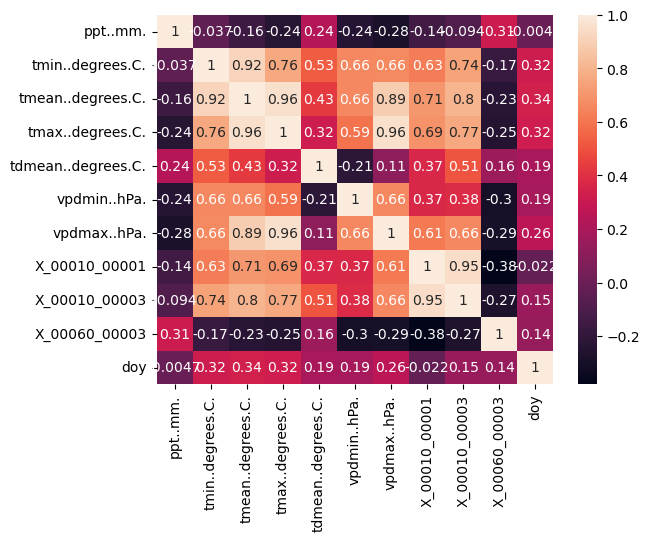

In [4]:
all_idv=[ 'ppt..mm.' 
     , 'tmin..degrees.C.'
     ,'tmean..degrees.C.'
     , 'tmax..degrees.C.', 'tdmean..degrees.C.',
      'vpdmin..hPa.', 
     'vpdmax..hPa.', 
        'X_00010_00001', # dep
  'X_00010_00003',  # dep
       'X_00060_00003' #,   'yr', 'mo',
     ,'doy' ]
corr_matrix= data[ all_idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

                   ppt..mm.  tmean..degrees.C.  vpdmax..hPa.  X_00060_00003
ppt..mm.           1.000000          -0.163020     -0.281024       0.309949
tmean..degrees.C. -0.163020           1.000000      0.888433      -0.232925
vpdmax..hPa.      -0.281024           0.888433      1.000000      -0.291252
X_00060_00003      0.309949          -0.232925     -0.291252       1.000000


<Axes: >

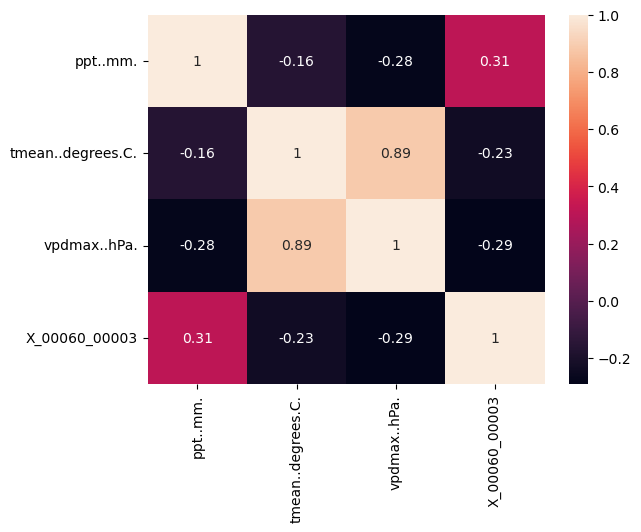

In [5]:
idv=[ 'ppt..mm.' 
     #, 'tmin..degrees.C.'
     ,'tmean..degrees.C.',
    # , 'tmax..degrees.C.', 'tdmean..degrees.C.',
     # ,'vpdmin..hPa.', 
     'vpdmax..hPa.', 
#        'X_00010_00001', # dep
 # 'X_00010_00003',  # dep
       'X_00060_00003' #,   'yr', 'mo',
    # ,'doy'
    ]
corr_matrix= data[ idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

In [6]:
#input=  data[  idv].to_numpy()
input=  data[  idv]

X_train, X_test, y_train, y_test = train_test_split( input,  data['X_00010_00003'], test_size=0.2, random_state=42)

print(X_train)
print(y_train)

     ppt..mm.  tmean..degrees.C.  vpdmax..hPa.  X_00060_00003
29        0.0               28.3         56.92           83.5
280       0.0               22.3         36.64           99.1
507       0.0               23.3         41.26          104.0
652       0.0               18.5         27.16          275.0
948       0.0               25.2         46.82           92.6
..        ...                ...           ...            ...
106       0.0               14.2         16.94           76.9
270       0.0               23.9         44.05          140.0
860       0.0               24.7         36.40           69.5
435       0.0               21.3         28.98          135.0
102       0.0               19.1         30.95           69.6

[806 rows x 4 columns]
29     18.7
280    18.5
507    18.9
652    16.6
948    18.3
       ... 
106    14.8
270    16.7
860    18.6
435    18.0
102    16.0
Name: X_00010_00003, Length: 806, dtype: float64


In [7]:
print(idv)
idv2=idv +  ['yr' ]
print(idv2)
idv3=idv2 +  [  'X_00010_00003']
input=  data[  idv2]
#input
X=input[idv2]
X_train=X[X['yr']<2021]
#print(X_train)
X_test=X[X['yr']>=2021]

input2=  data[  idv3]
Y=input2[idv3]
y_train=Y[Y['yr']<2021][  'X_00010_00003']
print(y_train)

y_test=Y[Y['yr']>=2021][  'X_00010_00003']


['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'X_00060_00003']
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'X_00060_00003', 'yr']
0      14.4
1      15.4
2      15.2
3      15.5
4      16.1
       ... 
729    17.5
730    17.3
731    17.6
732    16.4
733    15.0
Name: X_00010_00003, Length: 734, dtype: float64


0.8178606066140806


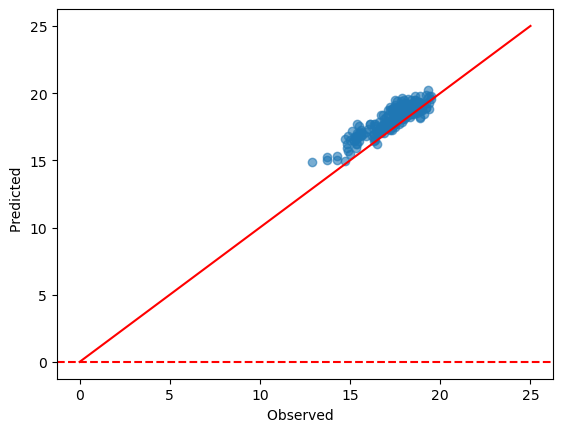

test: 0.8962888903431575
0.7513432171293765


In [8]:
linear_regr = LinearRegression()
linear_regr.fit(  X_train,  y_train )

train_fit= linear_regr.predict(X_train)

train_acc=    np.corrcoef(y_train , train_fit)[0, 1]    

print(train_acc)
yfit = linear_regr.predict(X_test)

plt.scatter( y_test , yfit , alpha=0.6)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Observed  ")
plt.ylabel("Predicted  ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]

print("test:",correlation_coefficient)
print( mean_absolute_error( y_test , yfit))

In [9]:
max_depths=[1,2,3,4,5,6,7,8,9]

for max_depth in max_depths:
    print("max depth:",max_depth)
    regr = DecisionTreeRegressor( random_state=42 ,max_depth=  max_depth )
    regr.fit(  X_train,  y_train )
    train_fit=regr.predict(X_train)
    yfit = regr.predict(X_test)
    correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
    rms = mean_squared_error(y_test, yfit, squared=False)
    # Print the correlation coefficient
    print("test correlation_coefficient:", np.corrcoef(y_train , train_fit)[0, 1] )
    print("test correlation_coefficient:",correlation_coefficient)
    print("MSE:", mean_absolute_error( y_test , yfit ) )
    print("RMS:",rms)

max depth: 1
test correlation_coefficient: 0.6383152800686559
test correlation_coefficient: 0.7330867107543956
MSE: 0.6880635583813346
RMS: 0.867576660098675
max depth: 2
test correlation_coefficient: 0.7477489981797879
test correlation_coefficient: 0.837700087747591
MSE: 0.5424595868172534
RMS: 0.6900024509466439
max depth: 3
test correlation_coefficient: 0.8012335292769164
test correlation_coefficient: 0.8549431456372868
MSE: 0.5084502224350345
RMS: 0.6547245691071009
max depth: 4
test correlation_coefficient: 0.846883976712939
test correlation_coefficient: 0.8472702790200441
MSE: 0.5219258863635253
RMS: 0.682716104708794
max depth: 5
test correlation_coefficient: 0.8833185953682314
test correlation_coefficient: 0.8452273525654375
MSE: 0.531202869650333
RMS: 0.7000921399741458
max depth: 6
test correlation_coefficient: 0.9124259519245617
test correlation_coefficient: 0.8516107126753688
MSE: 0.5301899591180202
RMS: 0.6860338592961259
max depth: 7
test correlation_coefficient: 0.932524

max depth: 5
correlation_coefficient: 0.8452273525654375
MSE: 0.531202869650333
RMS: 0.7000921399741458


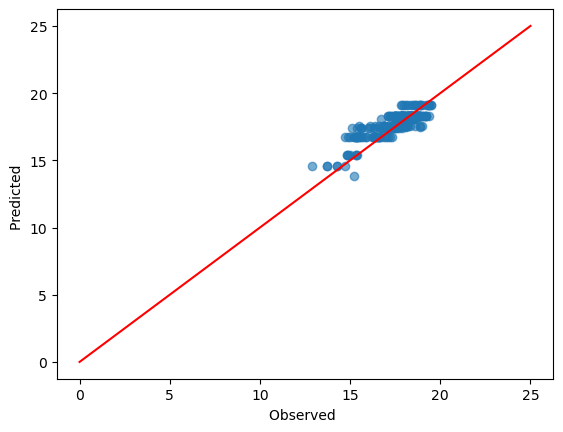

In [10]:
print("max depth:", 5)
regr = DecisionTreeRegressor( random_state=42 ,max_depth=  5)
regr.fit(  X_train,  y_train )
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

In [11]:
print(regr.feature_importances_)
print(idv)

[0.00833175 0.78016442 0.00539686 0.1334349  0.07267207]
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'X_00060_00003']


In [12]:
params = {
    "n_estimators": 250,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [13]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.4322


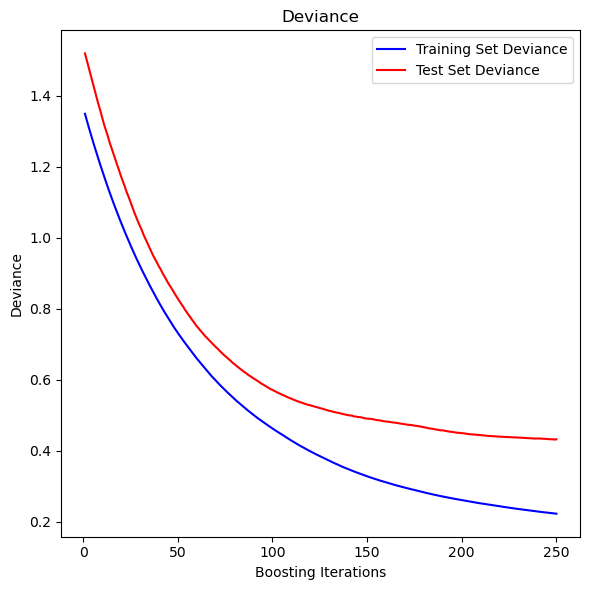

In [14]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

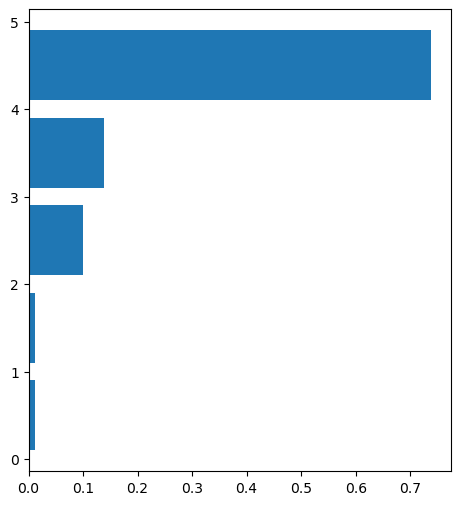

In [15]:
# Careful, impurity-based feature importances can be misleading for high cardinality features (many unique values). 
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(idv)[sorted_idx])
plt.title("Feature Importance  ")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array( idv)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [16]:
#from sklearn.datasets import load_breast_cancer
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split

#X, y = load_breast_cancer(return_X_y=True, as_frame=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train, y_train)
#print(f"Baseline accuracy on test data: {clf.score(X_test, y_test):.2}")

#X_train

In [17]:
from sklearn.inspection import permutation_importance


def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T, # importances : Raw permutation importance scores.
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

The plot on the left shows the Gini importance of the model. 

permuting a feature

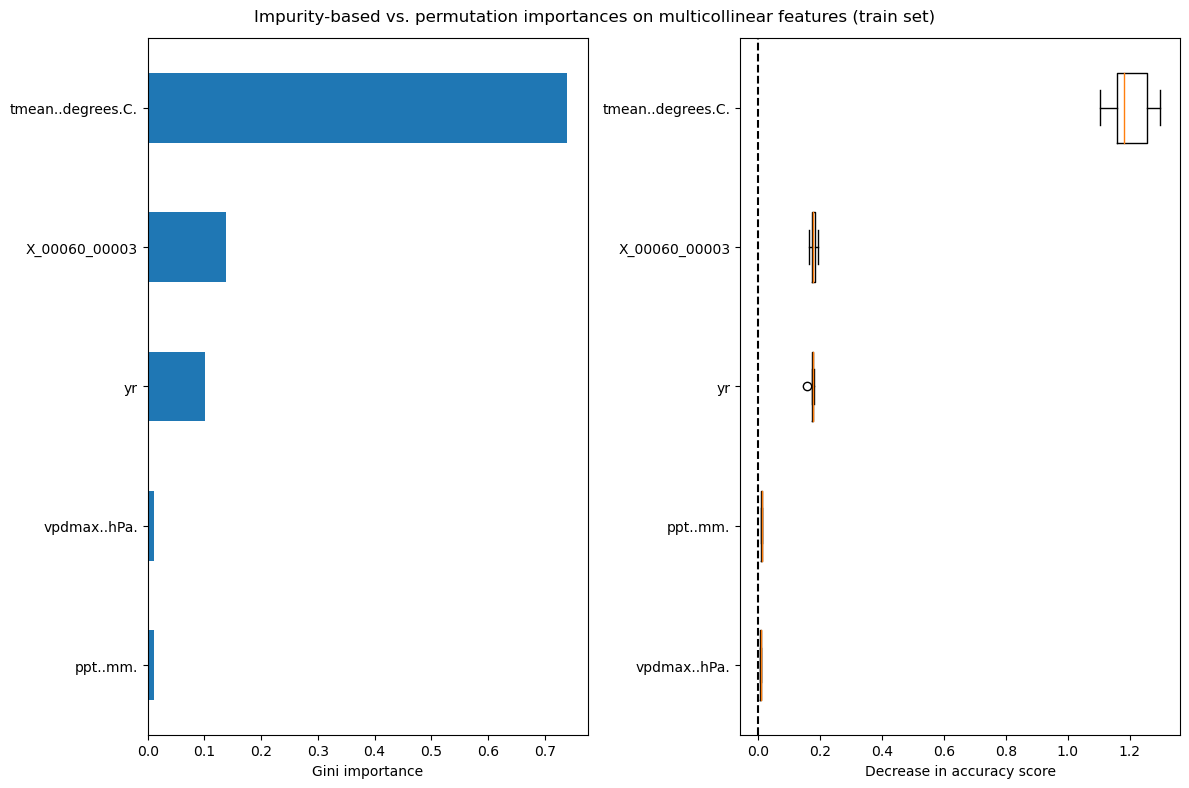

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mdi_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(reg.feature_importances_)
tree_indices = np.arange(0, len(reg.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(reg, X_train, y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

correlation_coefficient: 0.8804754588104253
MSE: 0.4986219829917525
RMS: 0.6574722443908183


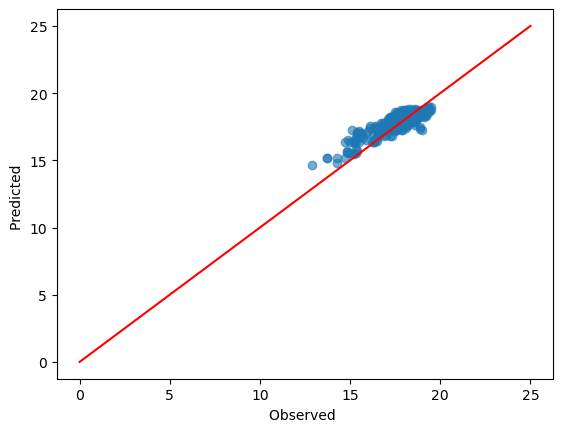

In [19]:
#regr = DecisionTreeRegressor( random_state=42 ,max_depth=  6)
#regr.fit(  X_train,  y_train )
#train_fit=regr.predict(X_train)
#yfit = regr.predict(X_test)

regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

(array([ 2.,  8.,  4.,  8., 19., 32., 42., 44., 94., 21.]),
 array([14.67535322, 15.11462642, 15.55389962, 15.99317282, 16.43244602,
        16.87171922, 17.31099242, 17.75026562, 18.18953882, 18.62881202,
        19.06808522]),
 <BarContainer object of 10 artists>)

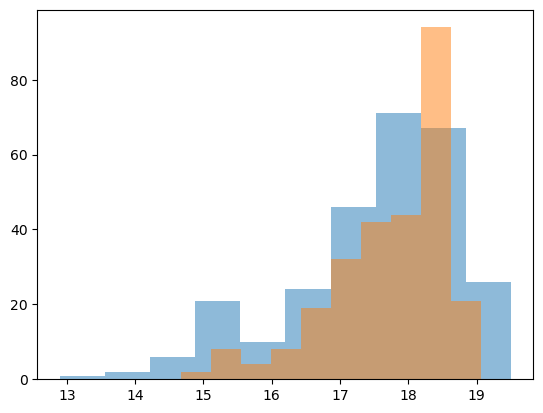

In [20]:
plt.hist(y_test , alpha=0.5)
plt.hist(yfit , alpha=0.5)